### Various plots with `ggplot2`

__A statistics and R learning exercise - do not rely on this notebook__.

Methods and examples shamelessly plundered.

There has been little 'generalised' testing, i.e. there may be many cases that break down.

DGMacA - current version 03 February 2023.

In [1]:
setwd(getwd()) # get and stay in current directory

#### Set up some random data

In [10]:
library(ggplot2, quietly = FALSE)
# This sample data will be used for the examples below:

set.seed(1234)
dat <- data.frame(cond = factor(rep(c("A","B"), each=200)), 
                rating = c(rnorm(200),rnorm(200, mean=.8)))
# View first few rows
head(dat)

# get statistics (mean, median, standard deviation)
xbar = mean(dat$rating, na.rm=TRUE) # discount any missing values
mn   = median(dat$rating, na.rm=TRUE)
stdv = sd(dat$rating, na.rm=TRUE)
cat('Mean, median, standard deviation: ', round(xbar,3), '  ', 
    round(mn,3), '  ', round(stdv,4))

cond,rating
A,-1.2070657
A,0.2774292
A,1.0844412
A,-2.3456977
A,0.4291247
A,0.5060559


Mean, median, standard deviation:  0.408    0.392    1.1147

#### Draw simple histogram

Add vertical lines at mean and median

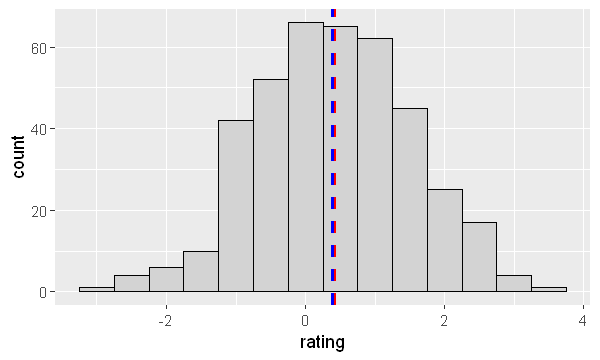

In [3]:
options(repr.plot.width=5, repr.plot.height=3) # set plot size (in inches)
# Draw with black outline, lightgrey fill
ggplot(dat, aes(x=rating)) +
    geom_histogram(binwidth=.5, colour="black", fill="lightgrey") +
    geom_vline(aes(xintercept=xbar),     
               color="red", linetype="dashed", size=1) +
    geom_vline(aes(xintercept=mn),   
               color="blue", linetype="dashed", size=1)

##### Draw density (equal-area) histogram and overlay with density plot

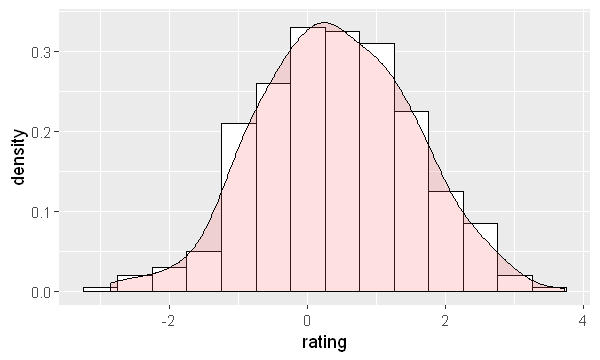

In [4]:
options(repr.plot.width=5, repr.plot.height=3) # set plot size (in)
# Histogram overlaid with kernel density curve
ggplot(dat, aes(x=rating)) + 
    geom_histogram(aes(y=..density..),      # Histogram with density instead of count on y-axis
                   binwidth=.5,
                   colour="black", fill="white") +
    geom_density(alpha=.2, fill="#FF6666")  # Overlay with transparent density plot

##### Draw density (equal-area) histogram and overlay with normal distribution

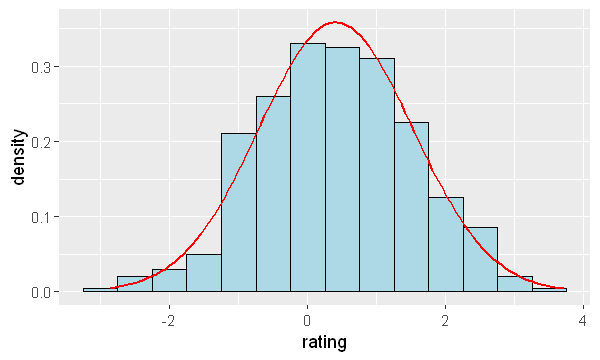

In [5]:
options(repr.plot.width=5, repr.plot.height=3) # set plot size (in)
# Histogram overlaid with normal distribution plot
ggplot(dat, aes(x=rating)) + 
    geom_histogram(aes(y=..density..),      # Histogram with density instead of count on y-axis
                   binwidth=.5,
                   colour="black", fill="lightblue") +
# Overlay with normal distribution plot
  stat_function(fun = dnorm, args = list(mean = xbar, sd = stdv), col="red", lwd=0.75) 

#### Draw side-by-side boxplots

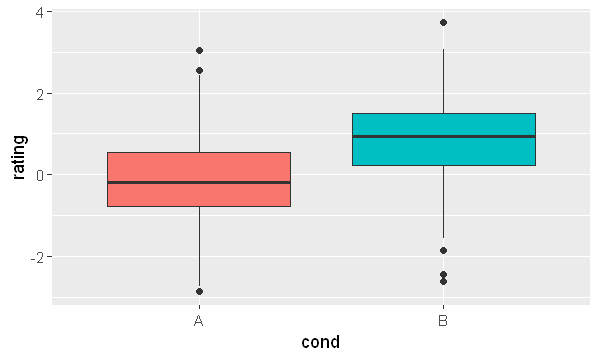

In [6]:
ggplot(dat, aes(x=cond, y=rating, fill=cond)) + geom_boxplot() +
    guides(fill="none")

##### Flip the axes

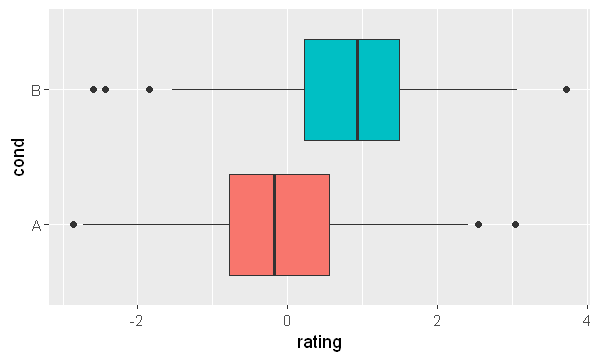

In [7]:
ggplot(dat, aes(x=cond, y=rating, fill=cond)) + geom_boxplot() + 
    guides(fill="none") + coord_flip()

#### Make a new box-plot and calculate values to compare

Median, IQR, min, max         =  40.69325    19.26811    -1.674883    89.961
Lower and upper quantiles     =  31.0604 50.32851
Mean, Variance, Std Deviation =  40.69297    224.4368    14.98121
Ends of whiskers              =  2.158231    79.23068

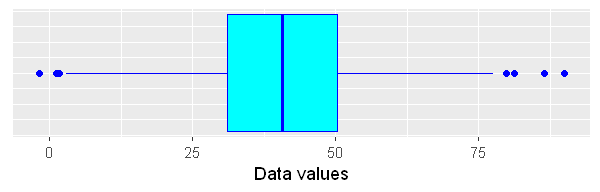

In [8]:
set.seed(12345)                # for reproducibility
g = rnorm(1000, 10, 15) + 30   # random normal data
#g = rpois(10000, 10)           # random Poisson data
mydat = data.frame(g)

cat('Median, IQR, min, max         = ', median(g),'  ', 
    IQR(g),'  ', min(g),'  ', max(g))
q = quantile(g, probs = c(1/4, 3/4))
cat('\nLower and upper quantiles     = ', q)
cat('\nMean, Variance, Std Deviation = ', mean(g),'  ',
    var(g),'  ', sd(g))
cat('\nEnds of whiskers              = ', quantile(g, 1/4)-1.5*IQR(g),
    '  ',quantile(g, 3/4)+1.5*IQR(g))

# Make the plot
options(repr.plot.width=5, repr.plot.height=1.6) # set plot size (inches)
ggplot(mydat, aes(y=g)) + 
geom_boxplot(color="blue", fill="cyan", lwd=0.5) +
guides(fill="none") + ylim(min(0, min(g)), max(g)) +
ylab("Data values") + coord_flip() +
theme(axis.title.y=element_blank(),
      axis.text.y=element_blank(),axis.ticks.y=element_blank())

#### Make a scatter-plot, highlighting minima and maxima on each axis

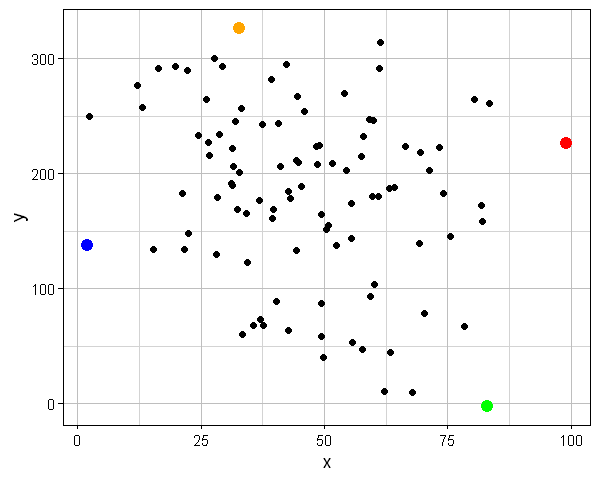

In [9]:
library(ggplot2)
options(repr.plot.width=5, repr.plot.height=4) # set plot size (in)

# create 2 sets of normal random data
ns = 100                 # sample size
xx = rnorm(ns, 50, 20)   # normal with mean=50, sd=20
yy = rnorm(ns, 175, 75)  # normal with mean=175, sd=750
df = data.frame(xx, yy)

ggplot(data = df, aes(x = xx, y = yy)) + 
   geom_point() +
   geom_point(data = df[which.max(df$xx), ], color="red", 
              size=3) +
   geom_point(data = df[which.min(df$xx), ], color="blue", 
              size=3) +
   geom_point(data = df[which.max(df$yy), ], color="orange", 
              size=3) +
   geom_point(data = df[which.min(df$yy), ], color="green", 
              size=3) +
# set up background grid for plot
   theme_linedraw() +
   theme(panel.grid.major=element_line(colour="gray", size=0.55),
       panel.grid.minor=element_line(colour="lightgray", size=0.001)) + 
   labs(x="x", y="y")